In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

## Read Data

In [83]:
a = pd.read_csv("/Users/abhishekvats/Desktop/customEnv/house-prices-advanced-regression-techniques/train.csv")
b = pd.read_csv("/Users/abhishekvats/Desktop/customEnv/house-prices-advanced-regression-techniques/test.csv")

In [84]:
target = a.iloc[:,-1:]
a = a.iloc[:,:-1]
c = pd.concat([a,b])

In [85]:
def update_missing():
    missing_ratio = c.isnull().sum()/len(c)
    missing_ratio = missing_ratio[missing_ratio>0]
    return (missing_ratio,missing_ratio.index)

In [86]:
plt.style.use('dark_background')
missing_ratio,missing_cols = update_missing()
top_missing_cols = missing_ratio[missing_ratio>0.15].index
missing_ratio[top_missing_cols]

LotFrontage    0.166495
Alley          0.932169
FireplaceQu    0.486468
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

## Drop Top Missing Values

In [87]:
c = c.drop(top_missing_cols,axis=1)
missing_ratio,missing_cols = update_missing()

In [88]:
missing_cols

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

## Forward Fill Columns with Very Few Missing Values

In [89]:
ffill_missing_cols = missing_ratio[missing_ratio<0.01].index

In [90]:
ffill_missing_cols

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [91]:
for col in ffill_missing_cols:
    c[col].ffill(inplace=True)

In [92]:
missing_ratio,missing_cols = update_missing()
missing_cols

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [93]:
missing_ratio[missing_cols]

BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinType2    0.027407
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
dtype: float64

In [94]:
c[c['BsmtQual'].isnull()]['TotalBsmtSF']
#Here we find out that many fields related to basement have the corresponding Basement surface
# area column set to zero which means the houses have no basement i.e these columns must be
# filled with NA
#Also similar for Garage variables Garage Cars is equal to zero 

17      0.0
39      0.0
90      0.0
102     0.0
156     0.0
       ... 
1343    0.0
1344    0.0
1364    0.0
1431    0.0
1444    0.0
Name: TotalBsmtSF, Length: 81, dtype: float64

In [95]:
for col in missing_cols:
    c[col].fillna('NA',inplace=True)

In [96]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [97]:
missing_ratio,missing_cols = update_missing()
missing_cols

Index([], dtype='object')

In [98]:
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

# Data Cleaning Complete

In [99]:
from scipy.stats import skew
numeric_feats = c.dtypes[c.dtypes != "object"].index
skewed_feats = c[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.587820
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425395
GrLivArea         1.269358
TotalBsmtSF       1.162429
BsmtUnfSF         0.919646
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623338
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
Id                0.000000
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [100]:
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))


In [101]:
fixing_skewness(c)

/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [102]:
numeric_feats = c.dtypes[c.dtypes != "object"].index
skewed_feats = c[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

PoolArea         14.985994
3SsnPorch         8.865144
LowQualFinSF      8.495602
MiscVal           5.239894
BsmtHalfBath      3.780960
KitchenAbvGr      3.779896
ScreenPorch       3.153911
BsmtFinSF2        2.579468
EnclosedPorch     2.150157
MasVnrArea        0.964713
2ndFlrSF          0.894536
WoodDeckSF        0.784768
HalfBath          0.730771
OpenPorchSF       0.621025
BsmtFullBath      0.617142
Fireplaces        0.554522
OverallCond       0.383000
BsmtFinSF1        0.373929
TotalBsmtSF       0.369553
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
BsmtUnfSF         0.054020
TotRmsAbvGrd      0.047226
GrLivArea         0.004848
Id                0.000000
1stFlrSF         -0.011611
LotArea          -0.135401
GarageCars       -0.219581
YearBuilt        -0.254677
YearRemodAdd     -0.451020
dtype: float64

## Assumptions of Regression
Linearity ( Correct functional form )
Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
Independence of Errors ( vs Autocorrelation )
Multivariate Normality ( Normality of Errors )
No or little Multicollinearity.

In [103]:
#Checking If our target is normally distributed
print("Skewness"+ str(target.skew()))
print("Kurtosis"+ str(target.kurt()))

SkewnessSalePrice    1.882876
dtype: float64
KurtosisSalePrice    6.536282
dtype: float64


In [104]:
final_features = pd.get_dummies(c).reset_index(drop=True)
final_features.shape

(2919, 401)

In [105]:
train = final_features[:len(a)]
test = final_features[len(a):]

In [106]:
train["SalePrice"] = target

/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


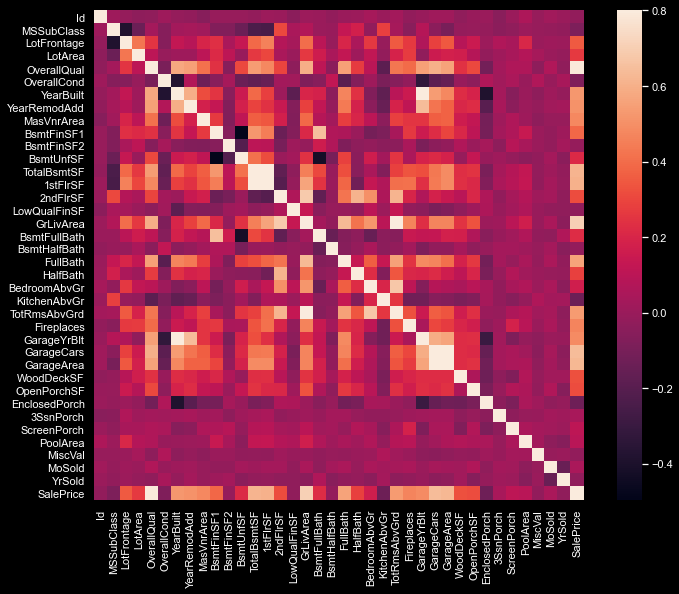

In [107]:
a['SalePrice']=target
corrmat = a.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

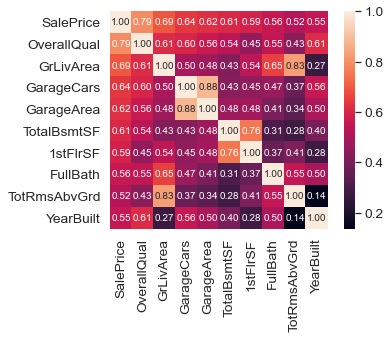

In [108]:
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},
                     yticklabels=cols.values,xticklabels=cols.values)
plt.show()

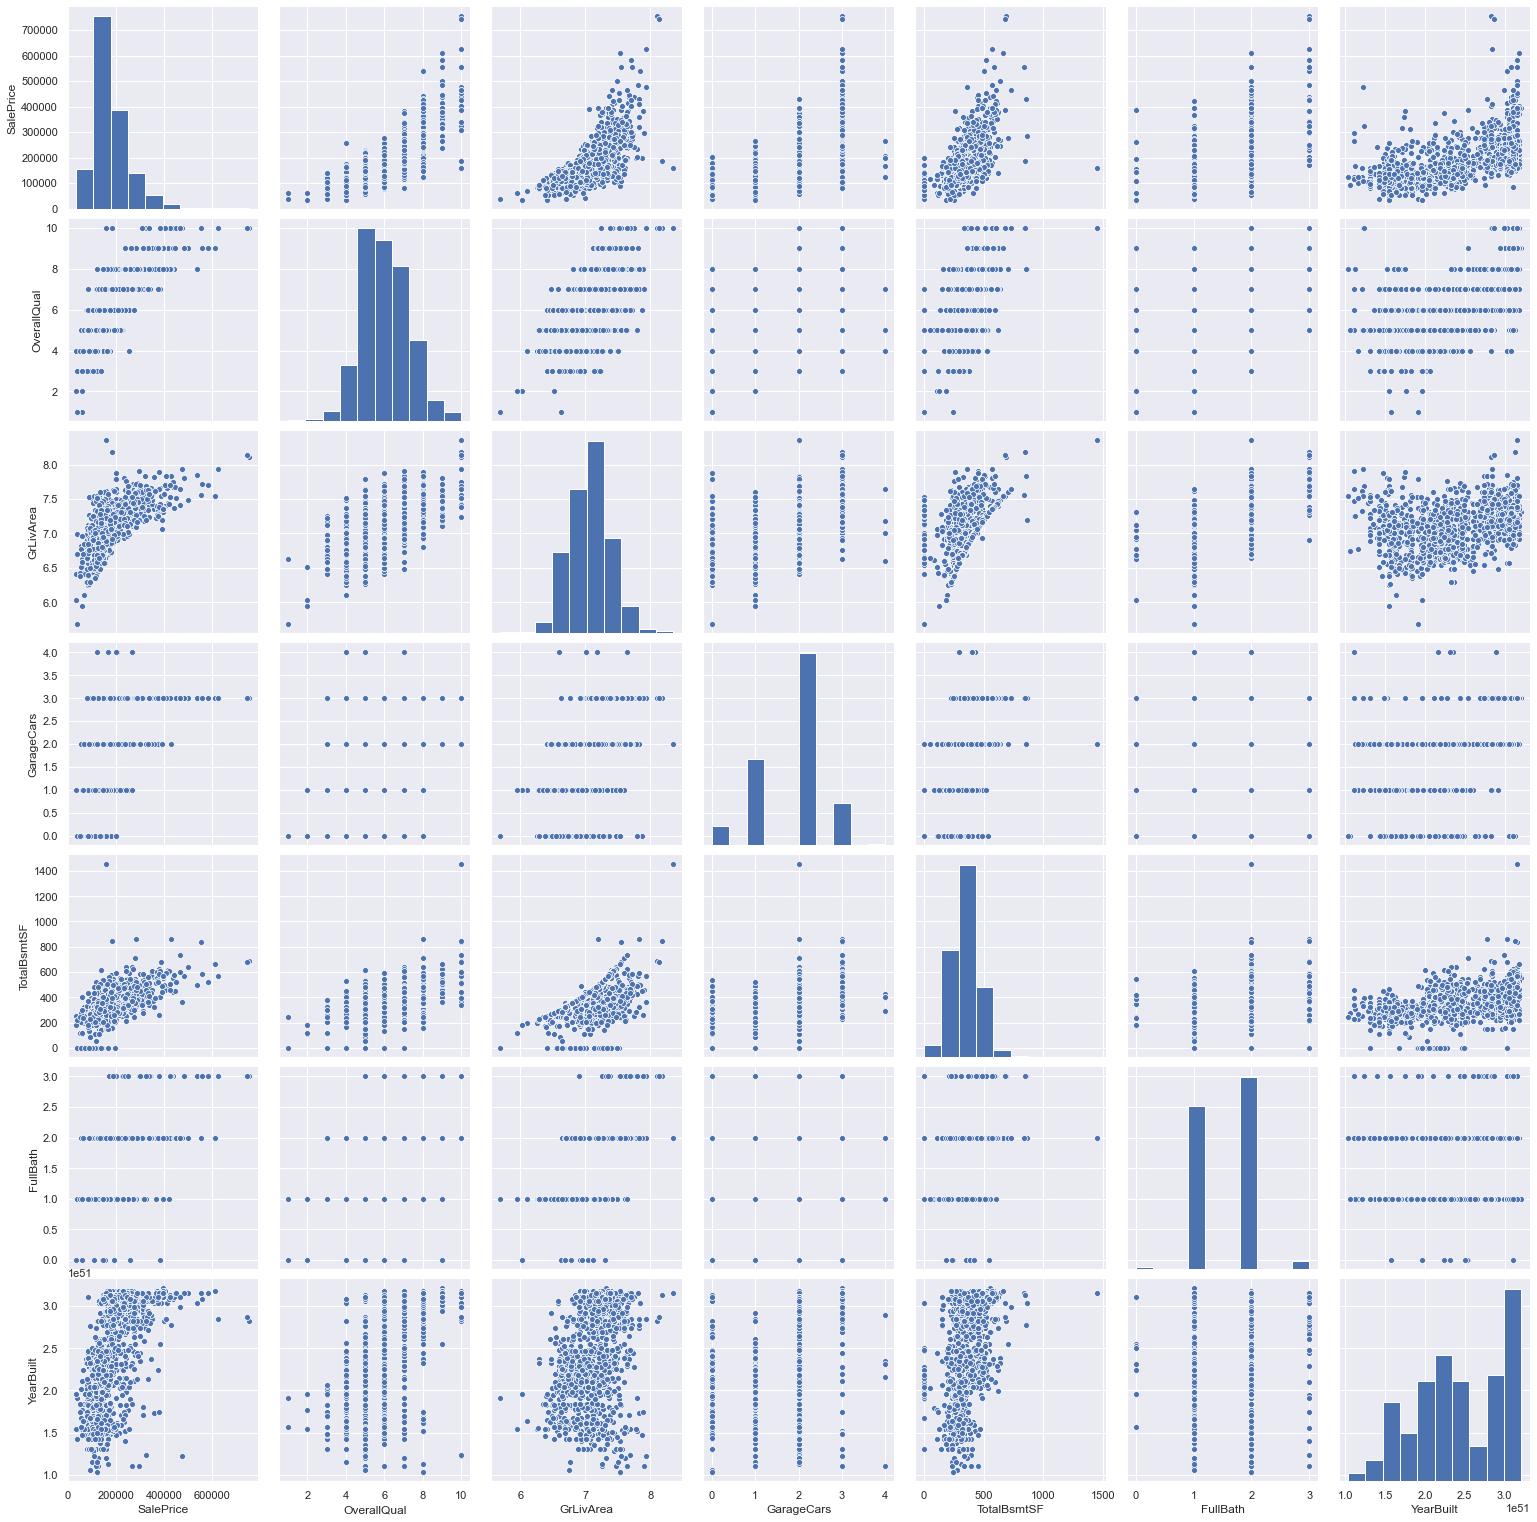

In [109]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],height=3)
plt.show()

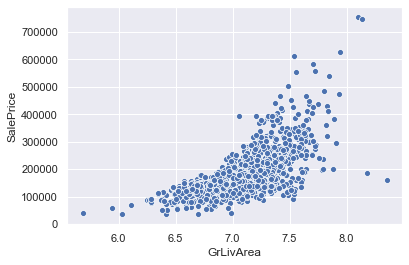

In [110]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])

In [111]:
train.nlargest(5,'GrLivArea')

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1298,1299,18.058232,10,3.989638,3.158395e+51,2008,37.208249,474.516267,0.0,59.379800,...,1,0,0,0,0,0,0,0,1,160000
523,524,16.921653,10,3.989638,3.133403e+51,2008,36.488118,257.118240,0.0,86.493936,...,1,0,0,0,0,0,0,0,1,184750
1182,1183,14.751523,10,3.989638,2.870456e+51,1996,0.000000,244.453675,0.0,45.624885,...,0,0,1,1,0,0,0,0,0,745000
691,692,15.471662,10,4.677073,2.824928e+51,1995,44.171125,191.344496,0.0,92.800752,...,0,0,1,0,0,0,0,1,0,755000
1169,1170,16.649176,10,3.989638,2.847607e+51,1996,47.489067,185.291243,0.0,65.041919,...,0,0,1,0,0,0,0,1,0,625000


In [112]:
# Outlier Removed
train.drop([1298,523],inplace=True)
train.nlargest(5,'GrLivArea')

/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1182,1183,14.751523,10,3.989638,2.870456e+51,1996,0.000000,244.453675,0.0,45.624885,...,0,0,1,1,0,0,0,0,0,745000
691,692,15.471662,10,4.677073,2.824928e+51,1995,44.171125,191.344496,0.0,92.800752,...,0,0,1,0,0,0,0,1,0,755000
1169,1170,16.649176,10,3.989638,2.847607e+51,1996,47.489067,185.291243,0.0,65.041919,...,0,0,1,0,0,0,0,1,0,625000
185,186,15.616734,10,6.633460,1.222738e+51,1993,0.000000,0.000000,0.0,99.187865,...,0,0,1,0,0,0,0,1,0,475000
304,305,15.114548,7,6.633460,1.104754e+51,2002,0.000000,0.000000,0.0,117.237186,...,0,0,1,0,0,0,0,1,0,295000


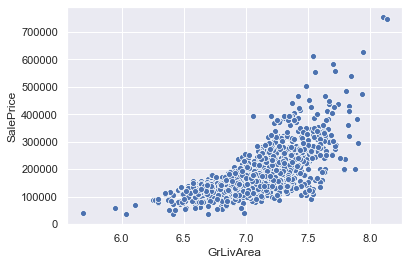

In [113]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])

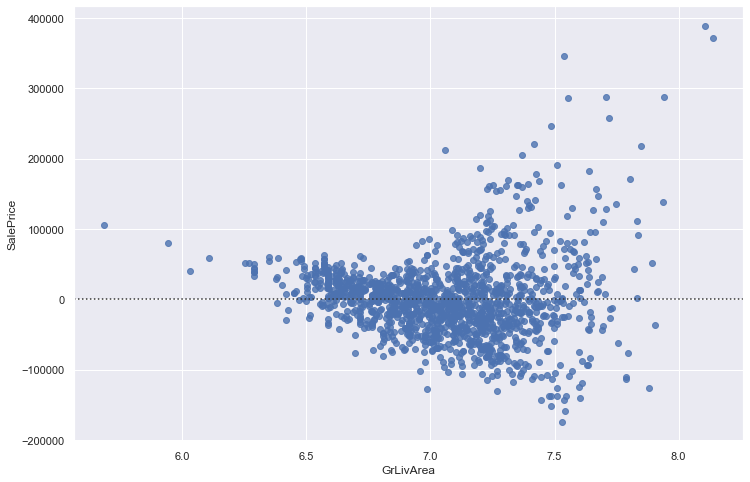

In [114]:
plt.subplots(figsize = (12,8))
sns.residplot(train.GrLivArea, train.SalePrice);

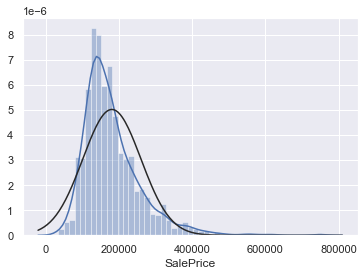

In [115]:
sns.distplot(train['SalePrice'],fit=stats.norm)

/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


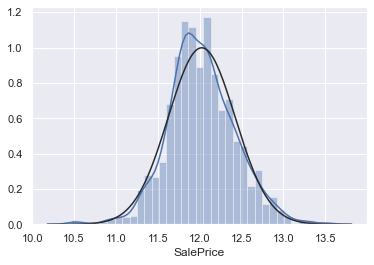

In [116]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=stats.norm)

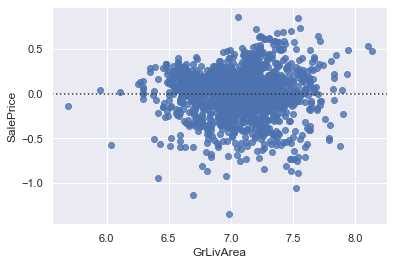

In [117]:
# Multivariate Normality Fixed by taking log transform of dependent variable Sale Price
sns.residplot(train.GrLivArea, train.SalePrice);

In [118]:
train.shape

(1458, 402)

In [119]:
X=train.drop(['SalePrice'],axis=1)
y = train['SalePrice'].reset_index(drop=True)

In [140]:
test

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,14.104341,5,4.677073,2.164829e+51,1961,0.000000,89.104312,7.758061,42.824601,...,0,0,0,1,0,0,0,0,1,0
1461,1462,14.551221,6,4.677073,2.112612e+51,1958,14.750180,140.903635,0.000000,54.690469,...,0,0,0,1,0,0,0,0,1,0
1462,1463,14.482936,5,3.989638,2.893477e+51,1998,0.000000,126.993421,0.000000,28.382146,...,0,0,0,1,0,0,0,0,1,0
1463,1464,13.776812,6,4.677073,2.916671e+51,1998,6.184367,105.633783,0.000000,47.781676,...,0,0,0,1,0,0,0,0,1,0
1464,1465,12.345545,8,3.989638,2.780078e+51,1992,0.000000,60.264138,0.000000,94.344006,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,10.503898,4,5.345039,2.328832e+51,1970,0.000000,0.000000,0.000000,65.255464,...,0,0,0,1,0,0,0,0,1,0
2915,2916,10.463056,4,3.989638,2.328832e+51,1970,0.000000,58.535989,0.000000,45.074543,...,0,0,0,1,1,0,0,0,0,0
2916,2917,15.304041,5,5.345039,2.147291e+51,1996,0.000000,170.362169,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,2918,13.873787,5,3.989638,2.780078e+51,1992,0.000000,71.327010,0.000000,67.294998,...,0,0,0,1,0,0,0,0,1,0


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)


In [126]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((976, 401), (976,), (482, 401), (482,))

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [128]:
lin_reg = LinearRegression(normalize=True,n_jobs=-1)
lin_reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [129]:
y_pred = lin_reg.predict(X_test)

In [130]:
mean_squared_error(y_test,y_pred)

3.1629314220505345e+24

# Linear Regression

In [131]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [132]:
scores.mean()

-0.2357649407019263

# Ridge Regression

In [133]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=False)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.22902e-115): result may not be accurate.
  overwrite_a=True).T
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.2438e-113): result may not be accurate.
  overwrite_a=True).T
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06595e-110): result may not be accurate.
  overwrite_a=True).T
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06397e-109): result may not be accurate.
  overwrite_a=True).T
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.04432e-108): result may not be accurate.
  o

In [134]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

10: 0.012670105748236573
20: 0.012714934445749719
30: 0.01281380847693209
5: 0.012833160294209214
40: 0.012912006265457134
4: 0.012937680057718698
3: 0.01311109328042482
2: 0.01342695199666762
1.5: 0.01369795355547577
1: 0.014138815655997047
0.5: 0.015033842073129425
0.01: 0.019370760135789852
0.001: 0.019662169055681612
0.0001: 0.01969293866288479
1e-05: 0.019696032864097875
1e-08: 0.01969637904896303
1e-10: 0.019696663910531237
-3: 0.17261127310402216
-2: 0.17261127310402216
-1: 0.17261127310402216
1e-15: 0.17261127310402216


In [135]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

10: 6.106990970650029
20: 6.128598402851366
30: 6.176255685881266
5: 6.1855832618088415
40: 6.223587019950338
4: 6.235961787820418
3: 6.319546961164763
2: 6.4717908623937905
1.5: 6.602413613739321
1: 6.814909146190576
0.5: 7.246311879248381
0.01: 9.3367063854507
0.001: 9.477165484838537
0.0001: 9.491996435510462
1e-05: 9.493487840495176
1e-08: 9.493654701600182
1e-10: 9.493792004876054
-3: 83.19863363613864
-2: 83.19863363613864
-1: 83.19863363613864
1e-15: 83.19863363613864


# Lasso Regression

In [136]:
from sklearn.linear_model import Lasso 
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=False)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6907720010750107, tolerance: 0.01534471639875318
  positive)
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6907739181384085, tolerance: 0.01534471639875318
  positive)
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6909634718655577, tolerance: 0.01534471639875318
  positive)
/opt/miniconda3/envs/Abhishek/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not con

In [137]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.001: 0.012295292592896537
0.0001: 0.014138392305263639
0.01: 0.017707742326301682
1e-05: 0.018439728767364737
1e-15: 0.01973895092826488
1e-10: 0.01973898357832464
1e-08: 0.019742230528231687
0.5: 0.03328121179772035
1: 0.03585727806637886
1.5: 0.03615791527297025
2: 0.03662864510755126
3: 0.03754028031192353
4: 0.03806524074960747
5: 0.03887382317365056
10: 0.04717106508925327
20: 0.07486414750862043
30: 0.0890998372581468
40: 0.09259632813655705
-1: 1839740344.7082405
-2: 7304167561.69266
-3: 16434379543.762522


In [138]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.001: 5.926331029776132
0.0001: 6.814705091137076
0.01: 8.535131801277412
1e-05: 8.887949265869798
1e-15: 9.514174347423669
1e-10: 9.514190084752476
1e-08: 9.515755114607671
0.5: 16.041544086501208
1: 17.283208027994608
1.5: 17.428115161571665
2: 17.655006941839705
3: 18.094415110347143
4: 18.347446041310793
5: 18.73718276969956
10: 22.736453373020055
20: 36.08451909915501
30: 42.94612155842677
40: 44.63143016182049
-1: 886754846149.3723
-2: 3520608764735.86
-3: 7921370940093.539


In [145]:
final_lasso = Lasso(alpha=0.001,normalize=False)
final_lasso.fit(X,y)

Lasso(alpha=0.001)

In [146]:
y_pred = final_lasso.predict(test)

In [147]:
y_pred = np.exp(y_pred)
y_pred

array([123728.69768688, 154565.95477314, 186019.33626231, ...,
       170789.43707768, 116668.75695501, 230541.26723042])

In [150]:
def export_submission(preds):
    pred = pd.DataFrame(preds)
    sub_df = pd.read_csv("/Users/abhishekvats/Desktop/customEnv/house-prices-advanced-regression-techniques/sample_submission.csv")
    datasets = pd.concat([sub_df['Id'],pred],axis=1)
    datasets.columns = ['Id','SalePrice']
    datasets.to_csv('lasso_submission.csv',index=False)

In [151]:
export_submission(y_pred)

# Ensembles

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [164]:
tree = DecisionTreeRegressor()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,13.424521,7,3.989638,3.035278e+51,2003,19.597706,117.625234,0.000000,29.997711,...,0,0,1,0,0,0,0,1,0,12.247699
1,2,13.694528,6,5.996436,2.444561e+51,1976,0.000000,146.501095,0.000000,44.146762,...,0,0,1,0,0,0,0,1,0,12.109016
2,3,14.034134,7,3.989638,2.987303e+51,2002,17.912712,91.408432,0.000000,56.912524,...,0,0,1,0,0,0,0,1,0,12.317171
3,4,13.683422,7,3.989638,1.482589e+51,1970,0.000000,52.695388,0.000000,64.827879,...,0,0,1,1,0,0,0,0,0,11.849405
4,5,14.550143,8,3.989638,2.963583e+51,2000,25.648478,111.824121,0.000000,61.183991,...,0,0,1,0,0,0,0,1,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,13.287740,6,3.989638,2.940039e+51,2000,0.000000,0.000000,0.000000,90.789404,...,0,0,1,0,0,0,0,1,0,12.072547
1456,1457,14.376784,6,4.677073,2.484320e+51,1988,15.457798,126.885217,8.043576,68.264158,...,0,0,1,0,0,0,0,1,0,12.254868
1457,1458,13.567456,7,6.633460,1.838328e+51,2006,0.000000,62.122254,0.000000,86.435646,...,0,0,1,0,0,0,0,1,0,12.493133
1458,1459,13.720310,5,4.677073,1.979080e+51,1996,0.000000,18.865106,13.081223,0.000000,...,0,0,1,0,0,0,0,1,0,11.864469
